This lab on the Introduction to R comes from "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

# The tidyverse

The textbook was written using `base` `R` functions, which can be unintuitive. For our labs, we will be using the so-called 'tidyverse,' which is based on the idea of tidy data and functions. Tidy data has observations as rows and variables as columns. All the observations must be at the same observational level. Tidy functions are pure, pipeable, and predictable. We'll begin to understand all of this more fully as we start to work with data.

Because the tidyverse is outside the `base` `R` functions, we must use packages (sometimes called libraries) to get the additional functionality. Packages are discussed further in Chapter 3. For now, lets just load a bunch of packages we'll need for our work.

In [2]:
library(ISLR)
library(dplyr)
library(readr)
library(ggplot2)
library(GGally)
library(mosaic)
library(manipulate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: lattice
Loading required package: mosaicData
Loading required package: Matrix

The 'mosaic' package masks several functions from core packages in order to add additional features.  
The original behavior of these functions should not be affected by this.

Attaching package: ‘mosaic’

The following object is masked from ‘package:Matrix’:

    mean

The following objects are masked from ‘package:dplyr’:

    count, do, tally

The following objects are masked from ‘package:stats’:

    binom.test, cor, cov, D, fivenum, IQR, median, prop.test, quantile,
    sd, t.test, var

The following objects are masked from ‘package:base’:

    max, mean, min, prod, range, sample, sum



# Loading Data

For most analyses, the first step involves importing a data set into ${\tt R}$. For this class, a lot of the data comes from the package itself, so we can use the ${\tt data()}$ function to import it.

We begin by loading in the ${\tt Auto}$ data set. This data is part of the ${\tt ISLR}$ package.

In [3]:
data(Auto)

Nothing happens when you run this, but now the data is available in your environment. (In RStudio, you would see the name of the data in your Environment tab).

To view the data, we can either print the entire dataset by typing its name, or we can "slice" some of the data off to look at just a subset.

In [14]:
Auto
Auto %>% 
    slice(1:10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,318,150,3436,11.0,70,1,plymouth satellite
4,16,8,304,150,3433,12.0,70,1,amc rebel sst
5,17,8,302,140,3449,10.5,70,1,ford torino
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4354,9.0,70,1,chevrolet impala
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
10,15,8,390,190,3850,8.5,70,1,amc ambassador dpl


mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


If data isn't internal to packages, .csv files are the most common way for data to be formatted. CSV files are simply text files, which you could alternatively open on your computer using a standard text editor. While it is often tempting to view a data set using Excel before loading it into ${\tt R}$, it can introduce problems in the data later. 

We can use the ${\tt read_csv()}$ function in the ${\tt readr}$ package to load in a CSV file. The help file contains details about how to use this function.

Before attempting to load a data set, we must make sure that ${\tt R}$ knows to search for the data in the proper directory. If you are using internal package data, this isn't a concern-- just make sure you have run ${\tt library()}$ on the package containing the data. For external data, the easiest way make sure the data is accessible to R is to put the data in the same folder as your Jupyter notebook. We have a file called ${\tt Auto.csv}$ in this directory, so we can read it in without worrying about the file path. 

When we read in data that is external, we must give it a name. We'll call it `Auto` and use the assignment operator `=`. The assignment operator `<-` is equivalent, and using one or the other is a matter of personal preference. 

In [16]:
Auto=read_csv("Auto.csv", na="?")
Auto %>% 
    slice(1:10)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
14,8,440,215,4312,8.5,70,1,plymouth fury iii
14,8,455,225,4425,10.0,70,1,pontiac catalina
15,8,390,190,3850,8.5,70,1,amc ambassador dpl


Notice that the data looks just the same as when we loaded it from the package. Now that we have the data, we can begin to learn things about it. 

In [6]:
dim(Auto)

[1] 392   9

In [7]:
str(Auto)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : chr  "chevrolet chevelle malibu" "buick skylark 320" "plymouth satellite" "amc rebel sst" ...


In [8]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

The ${\tt dim()}$ function tells us that the data has 392 observations, or rows, and
nine variables, or columns. The original data had some empty rows, but when we read the data in ${\tt R}$ knew to ignore them. 

The ${\tt str()}$ function tells us that most of the variables are numeric or integer, although the ${\tt name }$ variable is a character vector. 

${\tt names()}$ lets us check the variable names.

# Summary statistics

Often, we want to know some basic things about variables in our data. `summary()` on an entire dataset will give you an idea of some of the distributions of your variables.

The ${\tt summary()}$ function produces a numerical summary of each variable in
a particular data set.

In [17]:
 summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year           origin          name          
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:392        
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.54   Mean   :75.98   Mean   :1.577                     
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000                     
 Max.   :24.80   Max.   :82.00  

The summary suggests that `origin` might be better thought of as a factor. It only seems to have three possible values, `1`, `2` and `3`. If we read the documentation about the data (using `?Auto`) we will learn that these numbers correspond to where the car is from: 1. American, 2. European, 3. Japanese. So, lets `mutate()` that variable into a factor (categorical) variable.

In [4]:
Auto = Auto %>%
    mutate(origin = factor(origin))
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year       origin                  name    
 Min.   : 8.00   Min.   :70.00   1:245   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   2: 68   ford pinto        :  5  
 Median :15.50   Median :76.00   3: 79   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98           amc gremlin       :  4  
 3rd Qu.:17.02   3rd Qu.:79.00

We can also look at statistics for a particular variable with the function `favstats()`

In [21]:
favstats(~mpg, data=Auto)

,min,Q1,median,Q3,max,mean,sd,n,missing
,9,17,22.75,29,46.6,23.44592,7.805007,392,0


Or, just look at one particular statistic using `mean()`, `sd()`, `median()`, `IQR()`, and more.

In [22]:
mean(~displacement, data=Auto)

[1] 194.412

# Plotting

We can use the `ggplot2` package to produce simple graphics. `ggplot2` has a particular syntax, which looks like this

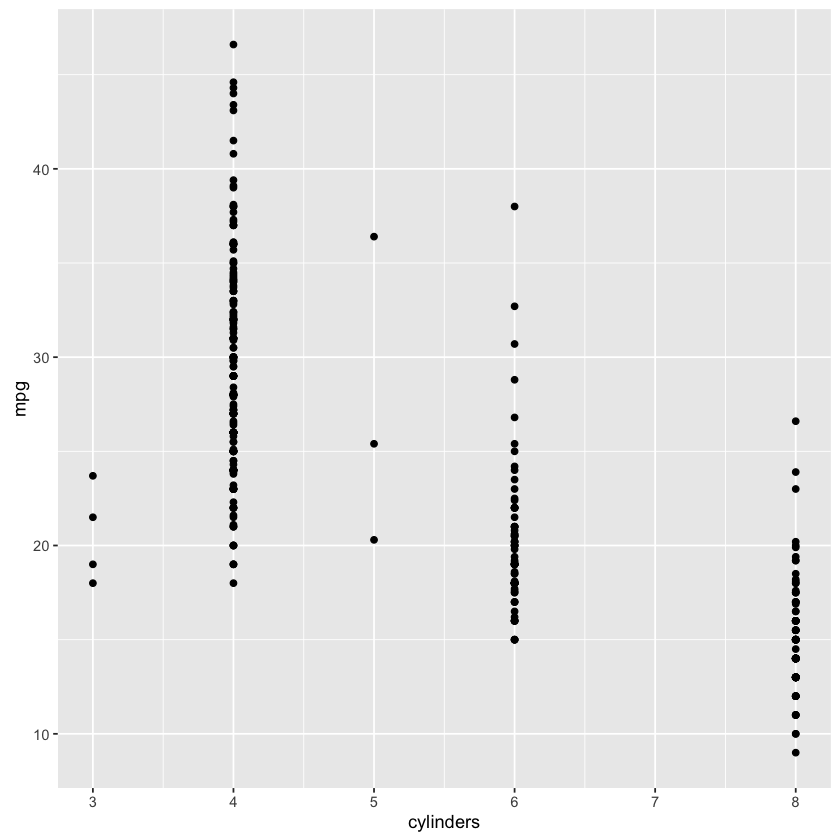

In [3]:
ggplot(Auto) + geom_point(aes(x=cylinders, y=mpg))

The basic idea is that you need to initialize a plot with `ggplot()` and then add "geoms" (short for geometric objects) to the plot. The `ggplot2` package is based on the [Grammar of Graphics](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwjV6I6F4ILPAhUFPT4KHTFiBwgQFggcMAA&url=https%3A%2F%2Fwww.amazon.com%2FGrammar-Graphics-Statistics-Computing%2Fdp%2F0387245448&usg=AFQjCNF5D6H3ySCsgqBTdp96KNF3bGyU2Q&sig2=GnNgoN6Ztn3AJSTJYaMPwA), a famous book on data visualization theory. It is a way to map attributes in your data (like variables) to "aesthetics" on the plot. The parameter `aes()` is short for aesthetic. 

For more about the `ggplot2` syntax, view the help by typing `?ggplot` or `?geom_point`. There are also great online resources for `ggplot2`, like the [R graphics cookbook](http://www.cookbook-r.com/Graphs/). 

In [7]:
?ggplot

The ${\tt cylinders}$ variable is stored as a numeric vector, so ${\tt R}$ has treated it
as quantitative. However, since there are only a small number of possible
values for cylinders, one may prefer to treat it as a qualitative variable.
We can turn it into a factor, again using a `mutate()` call. 

In [5]:
Auto = Auto %>%
    mutate(cylinders = factor(cylinders))

To view the relationship between a categorical and a numeric variable, we might want to produce _boxplots_. As usual, a number of options can be specified in order to customize the plots.

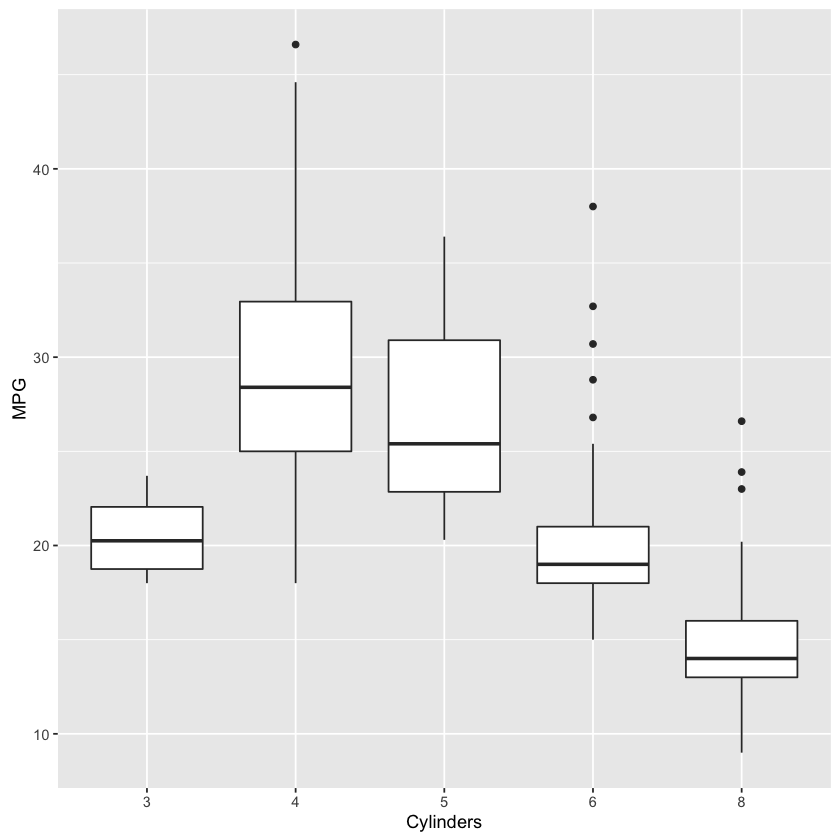

In [12]:
ggplot(Auto) + geom_boxplot(aes(x=cylinders, y=mpg)) + xlab("Cylinders") + ylab("MPG")

The geom `geom_histogram()` can be used to plot a histogram. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


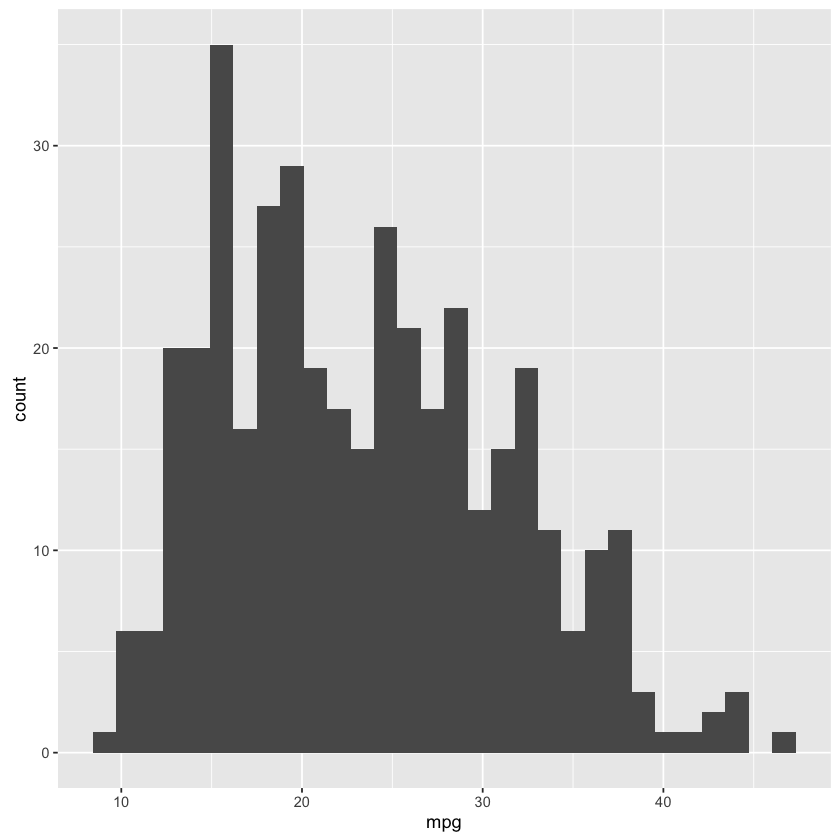

In [14]:
ggplot(Auto) + geom_histogram(aes(x=mpg))

The function warns us that it used a default number of bins, so we should think more carefully about what value makes sense.

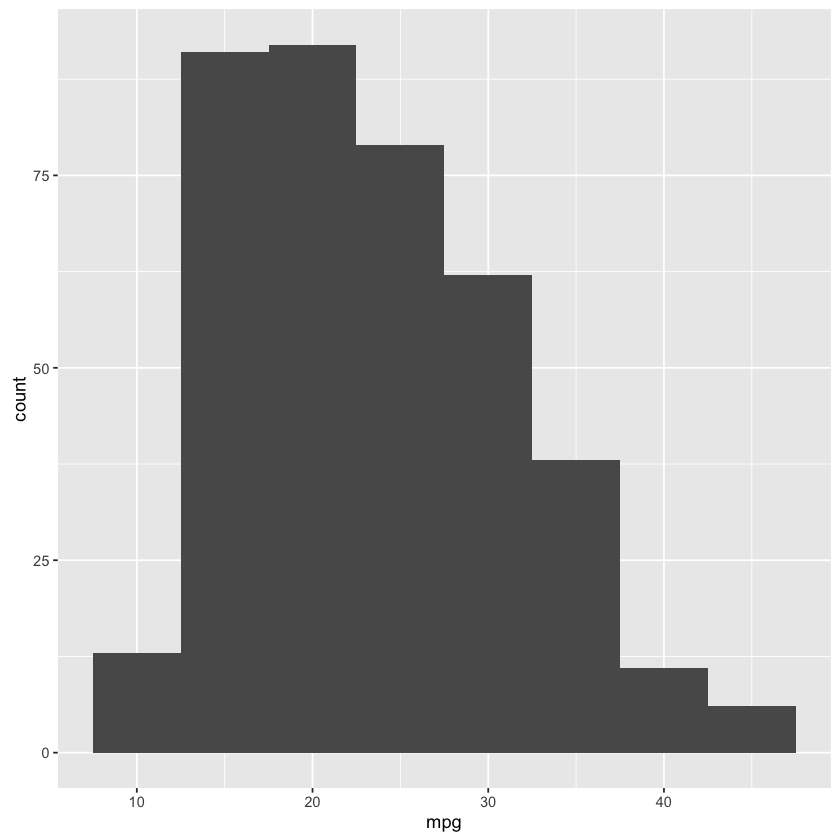

In [16]:
ggplot(Auto) + geom_histogram(aes(x=mpg), binwidth=5) 

In [5]:
manipulate(
ggplot(Auto) + geom_histogram(aes(x=mpg), binwidth=binw),
    binw = slider(min=2, max=, initial=10)
)

ERROR: Error in manipulate(ggplot(Auto) + geom_histogram(aes(x = mpg), binwidth = binw), : The manipulate package must be run from within RStudio


For small datasets, we might want to see all the bivariate relationships between the variables. The `GGally` package has an extension of the scatterplot matrix that can do just that. (Be patient-- it takes a long time!)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


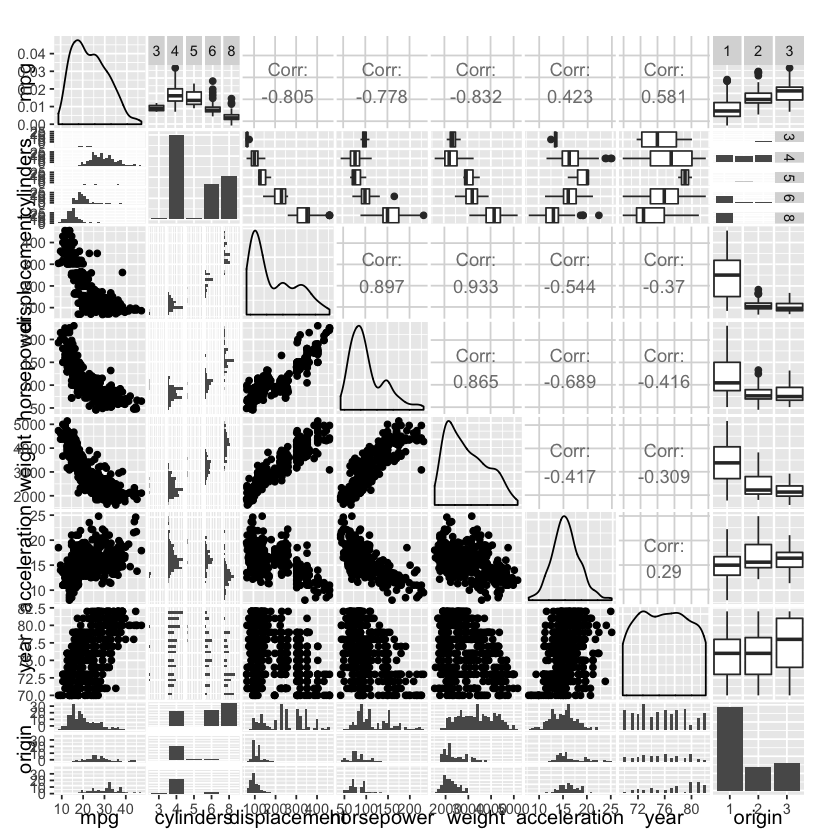

In [6]:
Auto %>% 
    select(-name) %>% 
    ggpairs()

We can also produce a pairs plot for just a subset of the variables by piping just a selection of the variables into the plot.  

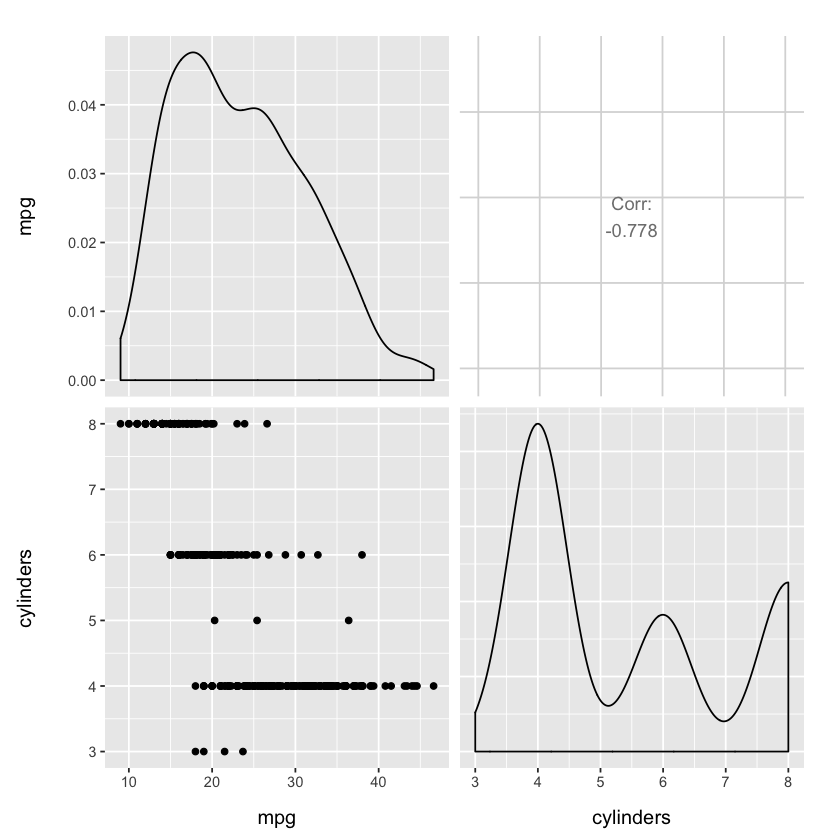

In [6]:
Auto %>% select(mpg, cylinders) %>%
    ggpairs()

Sometimes, we might want to save a plot for use outside of our Jupyter notebook. To do this, we must use the `ggsave()` function.

In [11]:
ggsave("histogram.jpg",
       ggplot(Auto) + geom_histogram(aes(x=mpg), binwidth=5) 
      )

Saving 7 x 7 in image


# Appendices

These sections are not required in order to understand the tidyverse material we are focusing on, but are part of the lab in the book, so we are including them here. The appendices start with making your own vectors and matrices, something which is almost never required in the tidyverse. Then, the appendices move on to more sophisticated plots (such as those in 3 dimensions) and finish up with some introduction to indexing using numbers. With our tidy tools, we will try to avoid indexing using numbers if at all possible, but you may want to look at this material to see another method for slicing data.

# Making vectors and matrices

${\tt R}$ uses functions to perform operations. To run a function called ${\tt funcname}$, we type ${\tt funcname(input1, input2)}$, where the inputs (or arguments) ${\tt input1}$ and ${\tt input2}$ tell ${\tt R}$ how to run the function. A function can have any number of inputs. 

For example, to create a vector of numbers, we use the function
${\tt c()}$ (for concatenate). Any numbers inside the parentheses are joined together. The following command instructs ${\tt R}$ to join together the numbers 1, 3, 2, and 5, and to save them as a vector named ${\tt x}$. When we type ${\tt x}$, it gives us back the vector.

In [1]:
x <- c(1,3,2,5)
x

[1] 1 3 2 5

We can also save things using $=$ rather than $<-$:

In [2]:
x = c(1,6,2)
x

[1] 1 6 2

Hitting the up arrow multiple times will display the previous commands,
which can then be edited. This is useful since one often wishes to repeat
a similar command. In addition, typing ${\tt ?funcname}$ will always cause ${\tt R}$ to
open a new help file window with additional information about the function
${\tt funcname}$.

In [3]:
?c

c {base},R Documentation
...,objects to be concatenated.
recursive,"logical. If recursive = TRUE, the function recursively descends through lists (and pairlists) combining all their elements into a vector."


We can tell ${\tt R}$ to add two sets of numbers together. It will then add the
first number from ${\tt x}$ to the first number from ${\tt y}$, and so on. To do this, ${\tt x}$ and
${\tt x}$ should be the same length. We can check the length of each vector using the ${\tt length()}$
function:

In [6]:
y = c(1,4,3)
length(x)==length(y)

[1] TRUE

Looks good, so let's sum them up (I'll print the starting value of the ${\tt x}$ and ${\tt y}$ vectors, too):

In [7]:
#Value of x
x

#Value of y
y

#Value of x+y
x+y

[1] 1 6 2

[1] 1 4 3

[1]  2 10  5

The ${\tt ls()}$ function allows us to look at a list of all of the objects, such as data and functions, that we have saved so far:

In [8]:
ls()

[1] "x" "y"

The ${\tt rm()}$ function can be used to delete any that we don’t want:

In [9]:
rm(x)
ls()

[1] "y"

It’s also possible to remove all objects at once (effectively clearing the history):

In [10]:
rm(list=ls())

The ${\tt matrix()}$ function can be used to create a matrix of numbers. Before
we use the ${\tt matrix()}$ function, we can learn more about it:

In [11]:
?matrix

matrix {base},R Documentation
data,an optional data vector (including a list or expression vector). Non-atomic classed R objects are coerced by as.vector and all attributes discarded.
nrow,the desired number of rows.
ncol,the desired number of columns.
byrow,"logical. If FALSE (the default) the matrix is filled by columns, otherwise the matrix is filled by rows."
dimnames,"A dimnames attribute for the matrix: NULL or a list of length 2 giving the row and column names respectively. An empty list is treated as NULL, and a list of length one as row names. The list can be named, and the list names will be used as names for the dimensions."
x,an R object.
...,additional arguments to be passed to or from methods.
rownames.force,"logical indicating if the resulting matrix should have character (rather than NULL) rownames. The default, NA, uses NULL rownames if the data frame has ‘automatic’ row.names or for a zero-row data frame."


The help file reveals that the ${\tt matrix()}$ function takes a number of inputs,
but for now we focus on the first three: the data (the entries in the matrix),
the number of rows, and the number of columns. First, we create a simple
matrix.

In [16]:
x=matrix(data=c(1,2,3,4,5,6), ncol=2, nrow=3)
x

1,4
2,5
3,6


Note that we could just as well omit typing ${\tt data=}$, ${\tt nrow=}$, and ${\tt ncol=}$ in the
${\tt matrix()}$ command above: that is, we could just type

In [15]:
x=matrix(c(1,2,3,4,5,6),3,2)
x

1,4
2,5
3,6


and this would have the same effect. However, it can sometimes be useful to
specify the names of the arguments passed in, since otherwise ${\tt R}$ will assume
that the function arguments are passed into the function in the same order
that is given in the function’s help file. As this example illustrates, by
default ${\tt R}$ creates matrices by successively filling in columns. Alternatively,
the ${\tt byrow=TRUE}$ option can be used to populate the matrix in order of the
rows.

In [18]:
matrix(c(1,2,3,4),2,2,byrow=TRUE)
matrix(c(1,2,3,4),2,2,byrow=FALSE)

1,2
3,4


1,3
2,4


(Notice that in the above command we did not assign the matrix to a value
such as ${\tt x}$. In this case the matrix is printed to the screen but is not saved
for future calculations.)

The ${\tt sqrt()}$ function returns the square root of each element of a vector or matrix. The command ${\tt x^2}$ raises each element of ${\tt x}$ to the power 2; any powers are possible, including fractional or negative
powers.

In [19]:
# orginal value of x
x

# square root
sqrt(x)

# values squared
x^2

1,4
2,5
3,6


1,2
1.414214,2.236068
1.732051,2.449490


1,16
4,25
9,36


The ${\tt rnorm()}$ function generates a vector of random normal variables,
with first argument ${\tt n}$ the sample size. Each time we call this function, we
will get a different answer. Here we create two correlated sets of numbers,
${\tt x}$ and ${\tt y}$, and use the ${\tt cor()}$ function to compute the correlation between
them.

In [26]:
x=rnorm(50)
y=x+rnorm(50,mean=50,sd=5)
cor(x,y)

[1] 0.2547746

By default, ${\tt rnorm()}$ creates standard normal random variables with a mean
of 0 and a standard deviation of 1. However, the mean and standard deviation
can be altered using the ${\tt mean}$ and ${\tt sd}$ arguments, as illustrated above.
Sometimes we want our code to reproduce the exact same set of random
numbers; we can use the ${\tt set.seed()}$ function to do this. The ${\tt set.seed()}$
function takes an (arbitrary) integer argument.

In [30]:
set.seed(13)
rnorm(50)

[1]  0.55432694 -0.28027194  1.77516337  0.18732012  1.14252615  0.41552613
 [7]  1.22950656  0.23667967 -0.36538277  1.10514427 -1.09359397  0.46187091
[13] -1.36098453 -1.85602715 -0.43985541 -0.19394690  1.39643151  0.10066325
[19] -0.11443881  0.70222523  0.26254267  1.83616330  0.35740242 -1.04541013
[25]  0.62018413  0.14935453 -1.45931685 -2.02704380 -1.05695776 -0.72814372
[31] -0.00821067  0.84779738 -0.38349150 -0.52651151 -0.27322596 -0.60574161
[37] -0.33286731 -0.24153755 -0.86277540 -0.84697075  0.10034035  1.59003353
[43]  0.56649488  1.61447949 -0.46865016 -0.72610140 -1.02333900 -1.93781553
[49]  0.27714729  1.40835367

We'll use ${\tt set.seed()}$ throughout the labs whenever we perform calculations
involving random quantities. In general this should allow each of you to reproduce
the results from the book. Depending on your version of ${\tt R}$ it is possible that some small discrepancies may appear between the book and your output from ${\tt R}$.

The ${\tt mean()}$ and ${\tt var()}$ functions can be used to compute the mean and
variance of a vector of numbers. Applying ${\tt sqrt()}$ to the output of ${\tt var()}$
will give the standard deviation. Or we can simply use the ${\tt sd()}$ function.

In [32]:
set.seed(3)
y=rnorm(100)
y[0:10]

# Compute the mean
mean(y)

# Compute the variance
var(y)

# Standard deviation = square root of variance
sqrt(var(y))

# But there's a function for that
sd(y)

[1] -0.96193342 -0.29252572  0.25878822 -1.15213189  0.19578283  0.03012394
 [7]  0.08541773  1.11661021 -1.21885742  1.26736872

[1] 0.01103557

[1] 0.7328675

[1] 0.8560768

[1] 0.8560768

# Graphics

We will now create some more sophisticated plots. The ${\tt contour()}$ function produces a contour plot in order to represent three-dimensional data; it is like a topographical map. It takes three arguments:

1. A vector of the ${\tt x}$ values (the first dimension),
2. A vector of the ${\tt y}$ values (the second dimension), and
3. A ${\tt matrix}$ whose elements correspond to the ${\tt z}$ value (the third dimension) for each pair of ${\tt (x,y)}$ coordinates.

As with the ${\tt plot()}$ function, there are many other inputs that can be used
to fine-tune the output of the ${\tt contour()}$ function. To learn more about
these, take a look at the help file by typing ${\tt ?contour}$.

ERROR: Error in file(con, "rb"): cannot open the connection


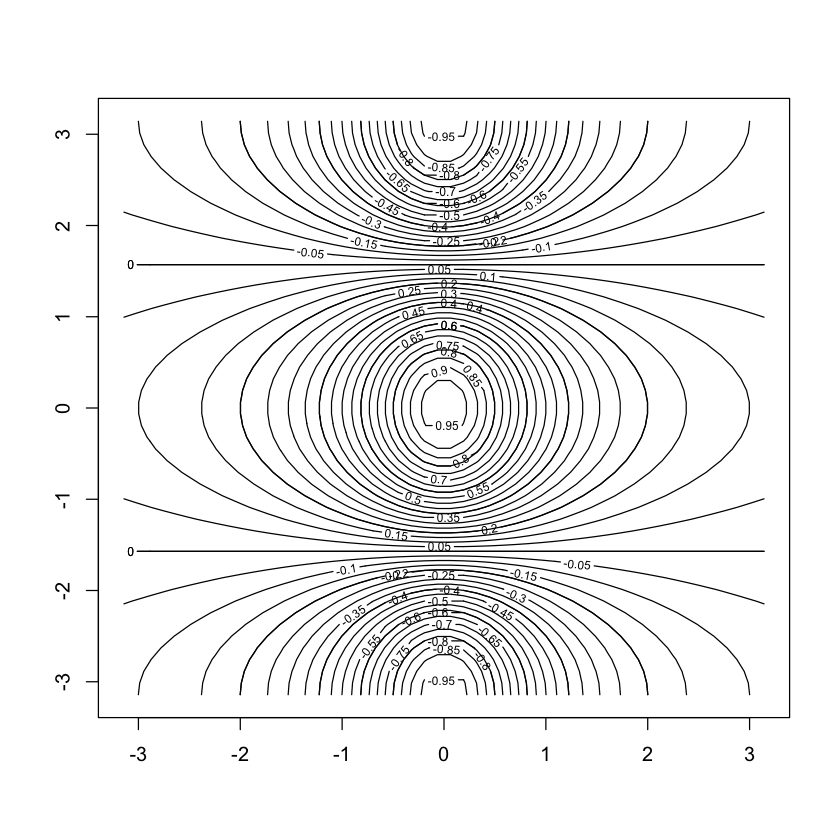

ERROR: Error in file(con, "rb"): cannot open the connection


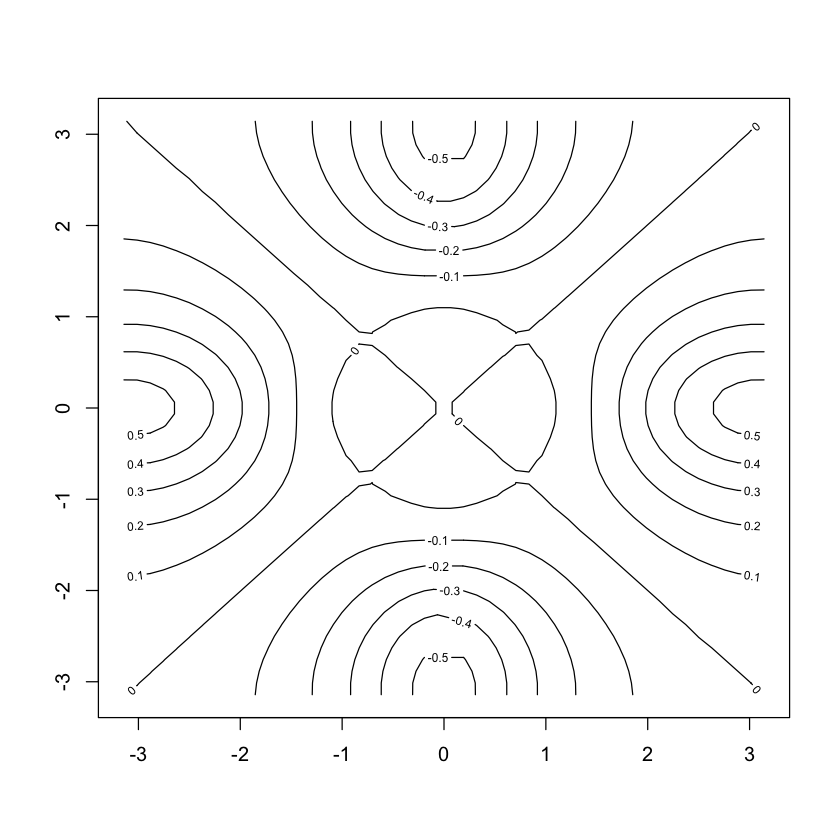

In [41]:
y=x
f=outer(x,y,function(x,y)cos(y)/(1+x^2))
contour(x,y,f)
contour(x,y,f,nlevels=45,add=T)
fa=(f-t(f))/2
contour(x,y,fa,nlevels=15)

The ${\tt image()}$ function works the same way as ${\tt contour()}$, except that it
produces a color-coded plot whose colors depend on the ${\tt z}$ value. This is known as a heatmap, and is sometimes used to plot temperature in weather
forecasts. Alternatively, ${\tt persp()}$ can be used to produce a three-dimensional
plot. The arguments ${\tt theta}$ and ${\tt phi}$ control the angles at which the plot is
viewed.

Warning message:
In svg(tf, width, height, pointsize, FALSE, family, bg, antialias): failed to load cairo DLLWarning message:
In file(con, "rb"): cannot open file '/var/folders/vl/4dhml63s0ms13fpkc8yqk7y5fcjp2k/T//RtmpS8vogR/file3f026e62b22c.svg': No such file or directory

ERROR: Error in file(con, "rb"): cannot open the connection


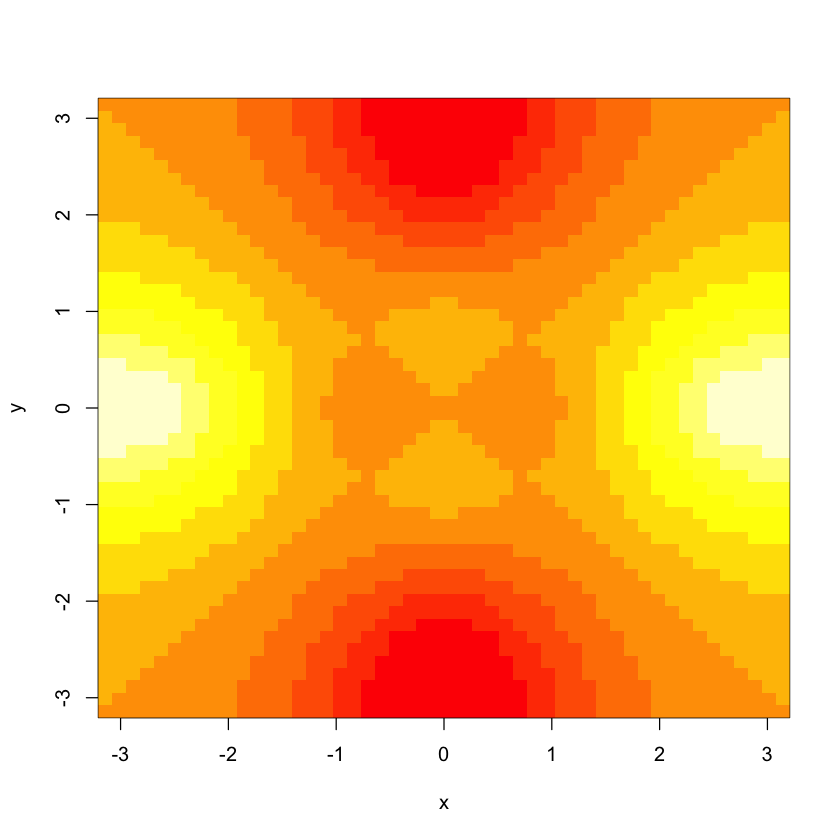

ERROR: Error in file(con, "rb"): cannot open the connection


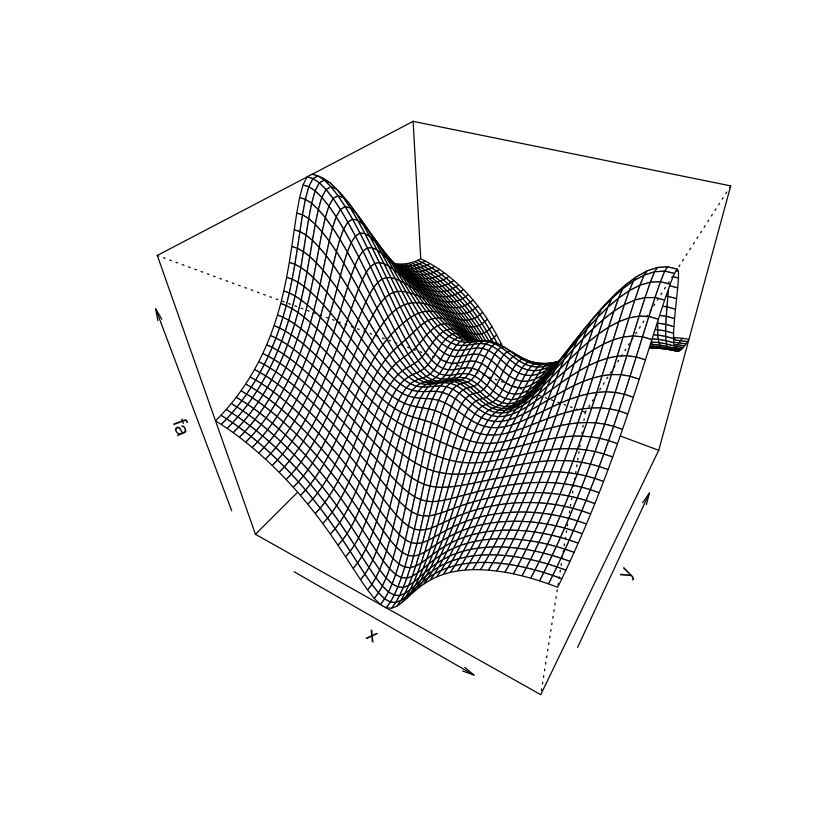

In [42]:
image(x,y,fa)
persp(x,y,fa,theta=30,phi=40)

# Indexing Data

We often wish to examine part of a set of data. Suppose that our data is
stored in the matrix ${\tt A}$.

In [43]:
A=matrix(1:16,4,4)
A

1,5,9,13
2,6,10,14
3,7,11,15
4,8,12,16


Then, typing:

In [44]:
A[2,3]

[1] 10

will select the element corresponding to the second row and the third column.
The first number after the open-bracket symbol ${\tt [}$ always refers to
the row, and the second number always refers to the column. We can also
select multiple rows and columns at a time, by providing vectors as the
indices.

In [45]:
A[c(1,3),c(2,4)]
A[1:3,2:4]
A[1:2,]
A[,1:2]

5,13
7,15


5,9,13
6,10,14
7,11,15


1,5,9,13
2,6,10,14


1,5
2,6
3,7
4,8


The last two examples include either no index for the columns or no index
for the rows. These indicate that ${\tt R}$ should include all columns or all rows,
respectively. ${\tt R}$ treats a single row or column of a matrix as a vector.

In [47]:
A[,1]

[1] 1 2 3 4

The use of a negative sign ${\tt -}$ in the index tells R to keep all rows or columns
_except_ those indicated in the index.

In [48]:
A[-c(1,3),]
A[-c(1,3),-c(1,3,4)]

2,6,10,14
4,8,12,16


[1] 6 8

The ${\tt dim()}$ function outputs the dimensions of a matrix, written as the number of rows followed by the number of
columns.

In [49]:
dim(A)

[1] 4 4